# IMPORTS

In [7]:
import joblib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pickle

# LOAD DATA

In [ ]:
with open("./data/summarizing_statistics.pkl", 'rb') as f:
    summarizing_statistics = joblib.load(f)
    
with open("./data/hist_off.pkl", 'rb') as f:
    hist_off = joblib.load(f)
    
with open("./data/hist_on.pkl", 'rb') as f:
    hist_on = joblib.load(f)
    
with open("./data/randForestBest_20201002.pkl", 'rb') as f:
    random_forest_model = joblib.load(f)  

In [32]:
feature_names = np.array(['energy_norm_log', 'temperature_diff', 'rms_norm_log', 'details_ratedhead'])


    Energy_norm_log: Logarithmus der Summe der Energiewerte der einzelnen Schwingungsachsen (x,y,z)
    Temperature_diff: Differenz der Temperatur am Vibrationssensor (befindet sich am Lager der Pumpe) und der Temperatur an der Batterie der Sendeeinheit
    Rms_norm_log: Logarithmus der Euklidischen Norm der quadratischen Mittelwerte der Schwingungen der einzelnen Achsen (x,y,z)
    Details_ratedhead: Nennförderhöhe der Pumpe. Ist für ein und dieselbe Pumpe immer konstant und sagt etwas über die Dimensionierung der Pumpe aus

# DATA EXPLORATION

In [3]:
summarizing_statistics

,number_of_datapoints,energy_norm_log_mean,temperature_diff_mean,rms_norm_log_mean,details_ratedhead_mean,energy_norm_log_min,temperature_diff_min,rms_norm_log_min,details_ratedhead_min,energy_norm_log_max,temperature_diff_max,rms_norm_log_max,details_ratedhead_max,Covariance_matrix
on,9680213,1.861944,9.513191,0.730331,105.323685,-5.914482,-24.000,-3.043901,-1.0,9.212087,110.625000,6.308744,2403.0,"[[4.054988675775044, 1.6181932043448362, 1.438..."
off,16775063,-3.226129,1.274514,-1.542884,89.319163,-10.605203,-38.875,-4.430309,-1.0,7.588837,109.140903,4.138240,2403.0,"[[1.5394827351582467, 0.21880415026212985, 0.7..."
all,26455276,-1.364360,4.289117,-0.711095,95.175355,-10.605203,-38.875,-4.430309,-1.0,9.212087,110.625000,6.308744,2403.0,"[[8.466562429846425, 10.45687699516861, 3.7031..."


In [8]:
hist_off[15][10][4][15] 
#absolute Häufigkeit der Datensätze für 'energy_norm_log' im 15. bin,  'temperature_diff' im 10. bin, 'rms_norm_log' im 4. bin und 'details_ratedhead' im 15. bin an

0

In [9]:
hist_on[15][10][4][15] 
#absolute Häufigkeit der Datensätze für 'energy_norm_log' im 15. bin,  'temperature_diff' im 10. bin, 'rms_norm_log' im 4. bin und 'details_ratedhead' im 15. bin an

1972

# MODEL EXPLORATION

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random_forest_model

RandomForestClassifier(max_depth=6, min_samples_leaf=1000, min_samples_split=15,
                       n_estimators=50, random_state=10)

In [11]:
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1000,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [25]:
random_forest_model_gini_importance = random_forest_model.feature_importances_

#https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

In [28]:
sorted_idx

array([3, 1, 2, 0])

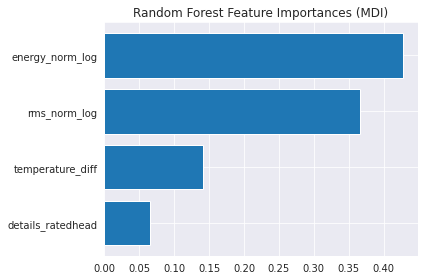

In [33]:
sorted_idx = random_forest_model_gini_importance.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, random_forest_model_gini_importance[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [24]:
feature_names

['energy_norm_log', 'temperature_diff', 'rms_norm_log', 'details_ratedhead']